# Model of a Hovercraft's Path
In this simulation, a hovercraft will have an angular and translational force exerted onto it by a leaf blower.  This will model a child ($m = 100kg$) in an HPUniverse hovercraft chair with a leaf blower exerting a horizontal force, while already levitating.  This levitation is excluded, but can be imagined by another leaf blower pointed downward, with the nozzle placed directly underneath the center, and creating perfectly uniformed uplift.

# Research Question
1. What is the path of a frictionless hovercraft?
2. What will happen to the hovercraft's path when the force is increased? 
3. What is the affect of the placement of the force on the hovercraft?

# Background

The Runge–Kutta methods, specifically the fourth one, is used to differentiate dependent variables, such as: x, y, theta, omega, and the velocity in the x-direction (vx) and the y-direction (vy).  This method, RK4, allows for the variables to be updated in real time, which in return allows for live-updates of the hovercraft's movement. 

The RK4 method to calculate $y_{n+1}$ at $t_{n+1}$ using $y_{n}$, $t_n$, and a time step $h$:

$$k_1 = hf(y_n,t_n)$$
$$f(y_n,t_n) = dy/dt$$

$$k_2 = hf\left(y_n+\frac{k_1}{2},t_n+\frac{h}{2}\right)$$

$$k_3 = hf\left(y_n+\frac{k_2}{2},t_n+\frac{h}{2}\right)$$

$$k_4 = hf\left(y_n+k_3,t_n+h\right)$$

$$y_{n+1} = y_n + \frac{k_1}{6} + \frac{k_2}{3} + \frac{k_3}{3} + \frac{k_4}{6}$$

This method was applied to update the position and the velocity in both the x and y directions.  The velocities were calculated by dividing the position by the time.  The tangental force is needed to accurately predict the hovercraft's motion as well.  This was done through calculating $dv/dt$ in the x-direction as $-F*sin(\theta)/m$ and in the y-dirextion as $F*cos(\theta)/m$.  Force ($F$) was used as a constant for simplicity.  Angular momentum ($\omega$) was calculated as the change in theta with respect to time.  Lastly, the change in angular momentum was calculated as torque divided by the moment of inertia ($\tau/I$).

# Computational Model
The simulation of the hovercraft is below. The mass of the system is set at $100kg$, the radius is $2m$, the force is set at $15000N$ currently, with the distance of the exerted foce from the center being eight tenths of the radius.  Torque is then this lenth multiplied by the force ($\tau_0 = F*r$), as force is tangential to the plane of the hovercraft due to constant force, no cross product is needed.

Depending on how much variation one would like, the following variables will have to be changed:

$F$ and $r$

The size of the plot's window will also have to be adjusted accordingly.

# Assumptions
The force being applied is constant, resulting in constant torque.  Another assumption being made is that there is no friction in the system.  Also, there is no stability issues in the upward's direction affecting the horizontal plane (x-y).

In [3]:
import odeCopy1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [48]:
def hovercraft(dep, t):
    x = dep[0]
    y = dep[1]
    theta = dep[2]
    vx = dep[3]
    vy = dep[4]
    omega = dep[5]
    deriv = np.zeros(6) #six is the number of differntial equations
    deriv[0] = vx #dx/dt
    deriv[1] = vy #dy/dt
    deriv[2] = omega #dtheta/dt
    deriv[3] = -F*np.sin(theta)/m #dVx/dt
    deriv[4] = F*np.cos(theta)/m #dVy/dt
    deriv[5] = torque0/I0 #dw/dt
    
    return deriv

#independent variables
t = 0
h = 0.01 #time step
Nsteps = int(500/h) #N steps for T seconds of evolution

# dfx = -F*np.sin(theta0)
# dfy = F*np.cos(theta0)

R = 2 #m
# Fpos = (2,0,0)
# xpos = (0,0,0)
# ypos = (0,0,0)
# r = xpos-ypos

# theta = I/r

#dependent variables
x0 = 0
y0 = 0
theta0 = 0
vx0 = 0
vy0 = 0
omega0 = 0

# torque0 = 1 #np.cross(r,Fpos)
I0 = 1 #moment of inertia in kg*m^2 
#changing the moment of inertia allows for a better understanding of the system

#constants
m = 100 #kg
F = 15000 #N
r = .8*R*10e-3 #distance of force from center
torque0 = F*r

data = np.array([x0, y0, theta0, vx0, vy0, omega0]) #initialize array to store dependent variables


#create arrays needed for plotting dependent variables vs. time
tarr = np.zeros(Nsteps)
xarr = np.zeros(Nsteps)
yarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
vxarr = np.zeros(Nsteps)
vyarr = np.zeros(Nsteps)
omegaarr = np.zeros(Nsteps)

tarr[0] = t
xarr[0] = x0
yarr[0] = y0
thetaarr[0] = theta0
vxarr[0] = vx0
vyarr[0] = vy0
omegaarr[0] = omega0

#create a time evolution loop
for n in range(1, Nsteps):
    
    data = odeCopy1.RK4(hovercraft, data, t, h) #update [theta,omega] by differentiating
#     v = R*data[1]
    t = t + h
    #store value in arrays
    tarr[n] = t
    xarr[n] = data[0]
    yarr[n] = data[1]
    thetaarr[n] = data[2]
    vxarr[n] = data[3]
    vyarr[n] = data[4]
    omegaarr[n] = data[5]

Current size: [12.0, 9.0]


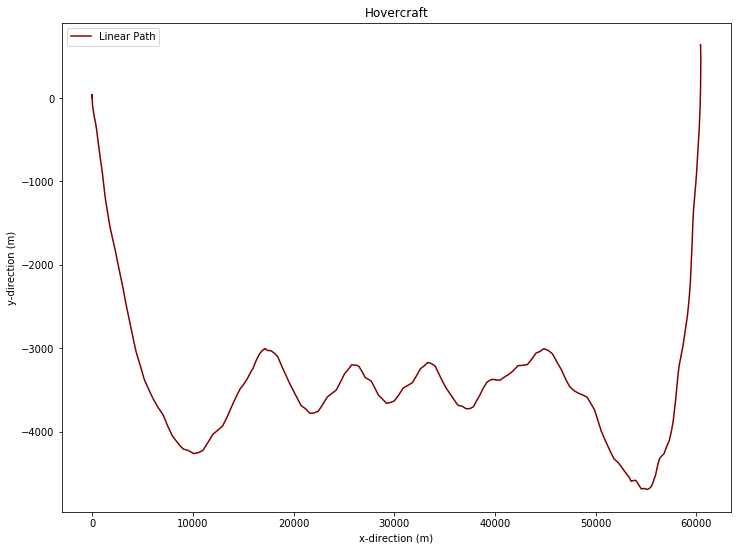

In [49]:
fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"] #Get current size
print("Current size:", fig_size)          #Prints: [8.0, 6.0]
fig_size[0] = 12                          #Set figure width to 12 and height to 9
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.title("Hovercraft")
plt.plot(xarr,yarr, color = "maroon", label='Linear Path')
plt.xlabel('x-direction (m)')
plt.ylabel('y-direction (m)')
# plt.ylim([0,15])
# plt.xlim([-5, 0])
plt.legend()
plt.show()

This plot shows the path of the hovercraft.  At $r = .8*R$ hovercraft begins at coordinates (0,0), and moves upwards in the positive y-direction and to the left in the negative x-direction.  Increasing the force (and the torque) yields a more complex image with even more curves and directional changes.  Changing the position of where the force is applied on the hovercraft, by changing the $r$ variable in $torque0$, will also change its path. The further the force is exerted from the center will yield more intricate paths.  Complex or intricate path is meant as more angular variation.  When looking at $r = .1*R$, the hovercraft takes much longer to rotate.  At $r = .8*R*10e-3$, the path is very interesting, as it takes awhile for the hovercraft to rotate, and then has periodic rotations.  The wiggles in the path shows some of the angular rotation of the hovercraft, this is called angular displacement.  This can be more closely visualized by plotting theta vs. time:

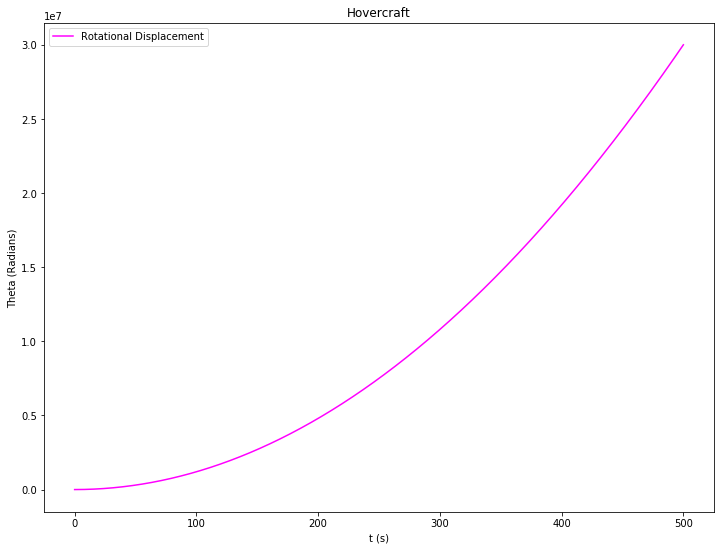

In [23]:
fig = plt.figure()
plt.title("Hovercraft")
plt.plot(tarr,thetaarr, color = "fuchsia", label='Rotational Displacement')
plt.xlabel('t (s)')
plt.ylabel('Theta (Radians)')
plt.legend()
plt.show()

As time goes on, theta exponentially increases.  The more force exerted, the larger theta can grow to.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


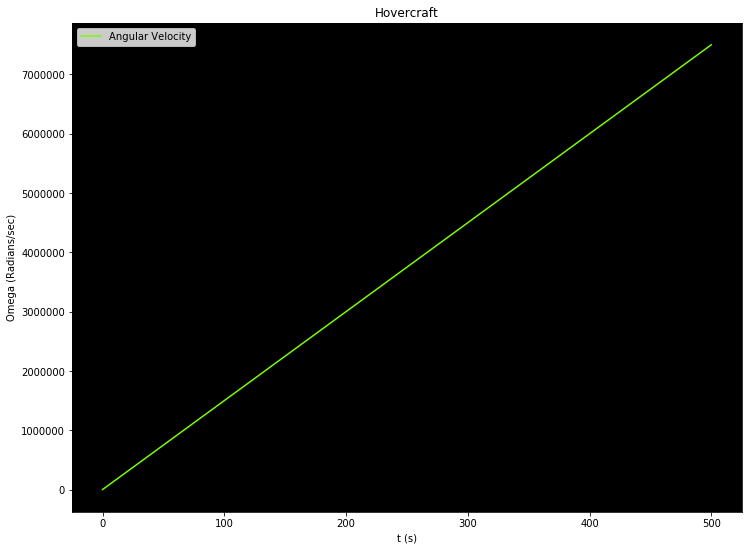

In [7]:
fig = plt.figure()
plt.title("Hovercraft")
ax = plt.axes()
# Setting the background color
ax.set_facecolor("black")
plt.plot(tarr,omegaarr, color = "lawngreen", label='Angular Velocity') #integral of this tells total speed
plt.xlabel('t (s)')
plt.ylabel('Omega (Radians/sec)')
plt.legend()
plt.show()

This is a linear velocity, which makes sense as there is constant force and torque, so there should be no change in acceleration.  As force is increased in the program, the final velocity is increased, but still, not the acceleration. 

# Conclusion

The path of a frictionless hovercraft is randomized and dependent on two factors: the constant force being applied and the position of where the force is being applied.  This tangental force will create more angular displacement and overall movement the greater it is. The rotational displacement has the same exponential curvature no matter what the initial conditions are, the only thing that changes is its magnitude in size.  Changing the location of where the force is applied affects the movement of the hovercraft, but there is no direct relationship.